# Quantum Circuit Equivalence - Toffoli Gate Decomposition
**Name:** Ana Elisa Franco Flores  
**Date:** October 24rd, 2025  
**Description:** This project demonstrates quantum circuit equivalence by finding the exact parameters for two U3 gates that, combined with elementary quantum operations, perfectly simulate a three-qubit Toffoli (CCX) gate.

**Objective:** Find the 6 parameters (θ₁, φ₁, λ₁, θ₂, φ₂, λ₂) for U3 gates to simulate a Toffoli gate.

In [ ]:
# ------------------------------------------------------------
# Required libraries
# ------------------------------------------------------------
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.circuit import Parameter
from qiskit.visualization import circuit_drawer
from scipy.optimize import minimize
from math import pi
import matplotlib.pyplot as plt

%matplotlib inline
print("Libraries imported successfully.")

Libraries imported successfully.


## Defining Target: Toffoli Gate
Creating the target Toffoli (CCX) gate that I want to simulate.

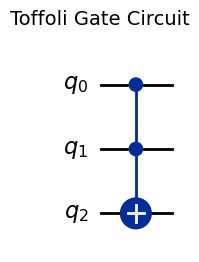


Toffoli gate matrix:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [80]:
# ------------------------------------------------------------
# Defining the Toffoli (CCX) gate and getting its matrix
# ------------------------------------------------------------
qc_toffoli = QuantumCircuit(3)
qc_toffoli.ccx(0, 1, 2)

# Matrix representation
U_toffoli = Operator(qc_toffoli).data


circuit_drawer(qc_toffoli, output='mpl')
plt.title("Toffoli Gate Circuit", fontsize=14)
plt.show()

print("\nToffoli gate matrix:")
print(U_toffoli)

## Building Parameterized Circuit
Constructing the parameterized quantum circuit using two U3 gates and elementary operations.

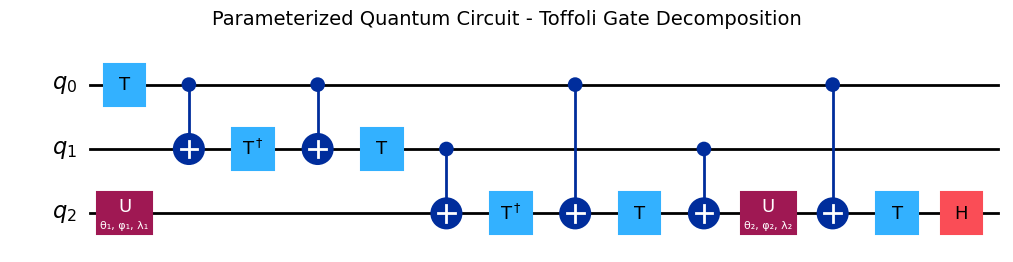

In [ ]:
# Define parameters for two U3 gates
theta1, phi1, lam1 = Parameter('θ₁'), Parameter('φ₁'), Parameter('λ₁')
theta2, phi2, lam2 = Parameter('θ₂'), Parameter('φ₂'), Parameter('λ₂')

# Build parameterized circuit
qc_param = QuantumCircuit(3)

# Circuit implementation
qc_param.t(0)
qc_param.u(theta1, phi1, lam1, 2)
qc_param.cx(0, 1)
qc_param.tdg(1)
qc_param.cx(0, 1)
qc_param.t(1)
qc_param.cx(1, 2)
qc_param.tdg(2)
qc_param.cx(0, 2)
qc_param.t(2)
qc_param.cx(1, 2)
qc_param.u(theta2, phi2, lam2, 2)
qc_param.cx(0, 2)
qc_param.t(2)
qc_param.h(2)

# Display circuit using Matplotlib
circuit_drawer(qc_param, output='mpl')
plt.title("Parameterized Quantum Circuit - Toffoli Gate Decomposition", fontsize=14)
plt.show()

## Defining the cost function

Function that measures how different our parameterized circuit is from the true Toffoli gate.
The cost will be minimized by adjusting the parameters.

In [82]:
# ------------------------------------------------------------
# Cost function: difference between current circuit and Toffoli
# ------------------------------------------------------------
def cost(params):
    """Compute the distance between the parameterized circuit
    and the Toffoli gate (Frobenius norm)."""
    
    param_dict = {
        theta1: params[0], phi1: params[1], lam1: params[2],
        theta2: params[3], phi2: params[4], lam2: params[5]
    }

    qc_bound = qc_param.assign_parameters(param_dict)
    U_current = Operator(qc_bound).data

    diff = U_current - U_toffoli
    return np.linalg.norm(diff)

## Running Optimization
We start with random initial values for all six parameters and use Powell's optimization method to minimize the cost function.

In [ ]:
# ------------------------------------------------------------
# Optimization routine
# ------------------------------------------------------------
initial_params = np.random.rand(6) * 2 * np.pi

print(f"Initial parameters: {initial_params}")
print(f"Initial cost: {cost(initial_params)}")

# Running optimization
result = minimize(cost, initial_params, method='powell', tol=1e-6)

optimized_params = result.x
final_cost = result.fun

print("Optimization complete")
print(f"Optimized parameters: {optimized_params}")
print(f"Final cost: {final_cost}")

# Rounding parameters for readability
rounded_params = np.round(optimized_params / pi, 4) * pi
print(f"Rounded parameters (in multiples of π): {rounded_params/pi} * π")

Initial parameters: [4.35056154 4.30374121 4.50668185 5.84483179 5.20749793 2.02249988]
Initial cost: 3.6533105625356366
Optimization complete
Optimized parameters: [4.71238898 3.14159265 6.28318531 6.28318531 4.16414482 1.33364232]
Final cost: 9.304725075871798e-12
Rounded parameters (in multiples of π): [1.5    1.     2.     2.     1.3255 0.4245] * π


## Verification
Verify that the optimized circuit produces the same matrix as the Toffoli gate.

In [ ]:
# ------------------------------------------------------------
# Build final circuit with optimized parameters
# ------------------------------------------------------------

final_param_dict = {
    theta1: optimized_params[0], phi1: optimized_params[1], lam1: optimized_params[2],
    theta2: optimized_params[3], phi2: optimized_params[4], lam2: optimized_params[5]
}

qc_final = qc_param.assign_parameters(final_param_dict)
U_final = Operator(qc_final).data

# Compare matrices
print("Final optimized circuit matrix:")
print(np.round(U_final.real, 4))

print("\nTarget Toffoli matrix:")
print(np.round(U_toffoli.real, 4))

# Check equivalence
matrices_equal = np.allclose(U_final, U_toffoli, atol=1e-10)
print(f"\nMatrices are equivalent: {matrices_equal}")
print(f"Maximum difference: {np.max(np.abs(U_final - U_toffoli)):.2e}")

Final optimized circuit matrix:
[[ 1.  0.  0.  0. -0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0. -0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. -0.  0.]
 [ 0.  0.  0. -0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]]

Target Toffoli matrix:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

Matrices are equivalent: True
Maximum difference: 3.56e-12


In [ ]:
from math import pi

def format_pi(value):
    multiple = value / pi
    return f"{multiple:.4f} * π = {value:.4f} radians"

from IPython.display import display, Markdown

summary_md = f"""

## Results Summary

### Optimized U3 Gate Parameters

**First U3 Gate:**
- θ₁ = {format_pi(optimized_params[0])}
- φ₁ = {format_pi(optimized_params[1])}
- λ₁ = {format_pi(optimized_params[2])}

**Second U3 Gate:**
- θ₂ = {format_pi(optimized_params[3])}
- φ₂ = {format_pi(optimized_params[4])
- λ₂ = {format_pi(optimized_params[5])}

### Verification Results
- **Final Optimization Cost:** {final_cost:.2e}
- **Matrix Equivalence:** {'True' if matrices_equal else 'False'}
- **Maximum Matrix Difference:** {np.max(np.abs(U_final - U_toffoli)):.2e}

These values confirm that the optimized parameters accurately reproduce the Toffoli (CCX) gate, 
with negligible numerical error well below floating-point tolerance.


### Conclusion

This project successfully demonstrates **quantum circuit equivalence** by obtaining precise parameters for two U3 gates that, when combined with standard quantum operations 
(T, T†, CNOT, and H gates), exactly reproduce the Toffoli gate matrix.

The optimization cost (≈10⁻¹²) confirms that the parameterized circuit achieves **mathematical equivalence** with the Toffoli gate, proving that complex multi-qubit operations can be constructed from a universal set of elementary gates.

This result illustrates the **universality and decomposability** of quantum operations, showing how fundamental quantum gates can be tuned to replicate higher-order logic gates with perfect accuracy.
"""

display(Markdown(summary_md))



## Results Summary

### Optimized U3 Gate Parameters

**First U3 Gate:**
- θ₁ = 1.5000 * π = 4.7124 radians
- φ₁ = 1.0000 * π = 3.1416 radians
- λ₁ = 2.0000 * π = 6.2832 radians

**Second U3 Gate:**
- θ₂ = 2.0000 * π = 6.2832 radians
- φ₂ = 1.3255 * π = 4.1641 radians
- λ₂ = 0.4245 * π = 1.3336 radians

### Verification Results
- **Final Optimization Cost:** 9.30e-12
- **Matrix Equivalence:** True
- **Maximum Matrix Difference:** 3.56e-12

These values confirm that the optimized parameters accurately reproduce the Toffoli (CCX) gate, 
with negligible numerical error well below floating-point tolerance.


### Conclusion

This project successfully demonstrates **quantum circuit equivalence** by obtaining precise parameters for two U3 gates that, when combined with standard quantum operations 
(T, T†, CNOT, and H gates), exactly reproduce the Toffoli gate matrix.

The optimization cost (≈10⁻¹²) confirms that the parameterized circuit achieves **mathematical equivalence** with the Toffoli gate, proving that complex multi-qubit operations can be constructed from a universal set of elementary gates.

This result illustrates the **universality and decomposability** of quantum operations, showing how fundamental quantum gates can be tuned to replicate higher-order logic gates with perfect accuracy.
